In [1]:
import matplotlib.pyplot as plt
import sympy as sp
from sympy import sin, cos, exp, ln
import scipy
import numpy as np
from random import random
from IPython.display import display, Latex

$ f(x) = xsin(3x) $ Рахуємо $\int_a^b f(x)dx $, a = 0, b = 2, $\varepsilon = 0.01$

In [2]:
x = sp.Symbol("x")
f = x * sin(3 * x)
epsilon = 0.01
a = 0
b = 2

Function to find all extemums on [a, b] for function f 

In [3]:
def find_extremum(f, x, a, b):
    res = []
    x1 = a
    f1 = sp.diff(f, x)
    while x1 < b:
        x1 += 1 / 100
        xr1 = sp.nsolve(f1, x, x1)
        flag = True
        for xr2 in res:
            if abs(xr1 - xr2) < 0.1:
                flag = False
                break
        if flag and xr1 < b and xr1 > a:
            res.append(xr1)

    return res

In [4]:
res = find_extremum(sp.diff(f, x), x, a, b)
#adding a and b to find global maximum
res.append(a)
res.append(b)
y = [sp.diff(f, x).subs({x:xi}) for xi in res]
M1 = max(y)
res

[0.358957995437268, 1.21453238914180, 0, 2]

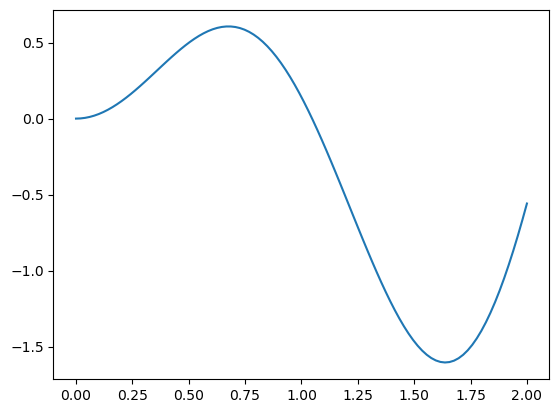

In [5]:
plt.plot(np.linspace(a, b, 100), [f.subs({x:x0}) for x0 in np.linspace(a, b, 100)])
plt.show()

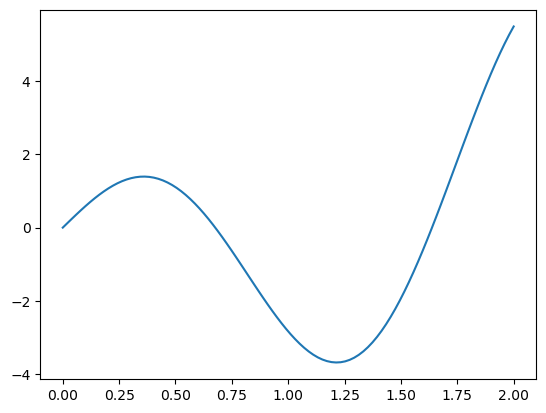

In [6]:
plt.plot(np.linspace(a, b, 100), [sp.diff(f, x).subs({x:x0}) for x0 in np.linspace(a, b, 100)])
plt.show()

# Праві прямокутники

## Помилка з теорії

$error = \frac{(b - a)^2 M1}{2n} $

In [8]:
result = 0
error = 0
n = 300
x0 = a
while x0 <= b:
    l1 = abs(sp.diff(f, x).subs({x:x0}))
    l2 = abs(sp.diff(f, x).subs({x:x0 + 1/n}))
    l = max(l1, l2)
    error += 1 / 2 / n / n * l
    x0+= 1 / n
    result += f.subs({x:x0}) / n

#залишок
error += 1 / 2 * (b - x0 + 1/n) ** 2 * sp.diff(f, x).subs({x:b})
result += f.subs({x:b}) * (b - x0 + 1/n)

error = abs(error)
print("real result is    {}".format(sp.integrate(f, (x, a, b)).evalf()))
print("our result is     {}".format(result.evalf()))
print("difference is     {}".format(sp.integrate(f, (x, a, b)).evalf() - result.evalf()))
print("estimete errors are {} and {}".format(error.evalf(), ((b - a) ** 2 * M1  / 2 / n).evalf()))


real result is    -0.671159690900125
our result is     -0.673948770313175
difference is     0.00278907941305040
estimete errors are 0.00651364936307813 and 0.0365440414780218


## Правило Рунге

$\frac{\left|y_{i, h}-y_{i, h / 2}\right|}{2^p-1}$

In [9]:
def kvadrati(f, x, a, b, h):
    xi = a
    res = 0
    while xi < b:
        xi += h
        res += h * f.subs({x:xi})
    return res

In [10]:
e = 10
h = 2
y1 = kvadrati(f, x, a, b, h)
while e > epsilon:
    y2 = kvadrati(f, x, a, b, h/2)
    e = abs(y1 - y2) / (3) # |y1 - y2| / 2^p - 1
    y1 = y2
    h /= 2
print(h)
print(e)

0.25
0.00653031272659070


# Трапеції

$\int_a^b f(x) d x=\frac{f(a)+f(b)}{2}(b-a)+E(f), \quad E(f)=\frac{f^{\prime \prime}(\xi)}{12}(b-a)^3$

In [11]:
res = find_extremum(sp.diff(f, x, x), x, a, b)
#adding a and b to find global maximum
res.append(a)
res.append(b)
y = [abs(sp.diff(f, x, x).subs({x:xi})) for xi in res]
M1 = max(y)
res

[9.95682444457783e-60, 0.818547954293147, 1.74431281783747, 0, 2]

In [12]:
result = 0
error = 0
n = 100
x0 = a
result += f.subs({x:x0}) / 2 / n
while x0 <= b:
    l1 = abs(sp.diff(f, x, x).subs({x:x0}))
    l2 = abs(sp.diff(f, x, x).subs({x:x0 + 1/n}))
    l = max(l1, l2)
    error += 1 / 12 / n ** 2 * l
    x0 += 1 / n
    result += f.subs({x:x0}) / n

#залишок
x0 -= 1/n
error += 1 / 12 * (b - x0) ** 2 * sp.diff(f, x, x).subs({x:b})
result += (f.subs({x:x0}) + f.subs({x:b})) / 2 * (b - x0) - f.subs({x:x0}) / n / 2

result = result.evalf()
error = abs(error.evalf())
print("real result is     {}".format(sp.integrate(f, (x, a, b)).evalf()))
print("our result is      {}".format(result))
print("difference is       {}".format(sp.integrate(f, (x, a, b)).evalf() - result))
print("estimete errors are {} and {}".format(error, ((b - a)**3 * M1  / 12 / n).evalf()))


real result is     -0.671159690900125
our result is      -0.676702320196896
difference is       0.00554262929677163
estimete errors are 0.0132956077579269 and 0.110690575480162


## Правило Рунге

In [13]:
def trapet(f, x, a, b, h):
    xi = a
    res = 0
    while xi < b:
        res += h * (f.subs({x:xi}) + f.subs({x:xi+h})) / 2
        xi += h
    return res

In [14]:
e = 10
h = 2
while e > epsilon:
    y1 = trapet(f, x, a, b, h)
    y2 = trapet(f, x, a, b, h/2)
    e = abs(y1 - y2) / (3)
    h /= 2
print(h)
print(e)

0.125
0.00721357185224429


# Сімпсон

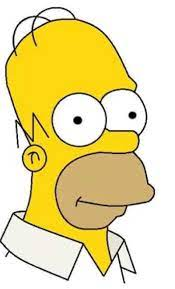

$\int_a^b f(x) d x \approx \frac{b-a}{6}\left(f(a)+4 f\left(\frac{a+b}{2}\right)+f(b)\right)$

In [15]:
res = find_extremum(sp.diff(f, x, x, x, x), x, a, b)
#adding a and b to find global maximum
res.append(a)
res.append(b)
y = [abs(sp.diff(f, x, x, x, x).subs({x:xi})) for xi in res]
M1 = max(y)
res

[0.884554133186355, 1.81811791829427, 0, 2]

In [32]:
result = 0
error = 0
n = 1000
x0 = a
while x0 <= b:
    l1 = abs(sp.diff(f, x, x, x, x).subs({x:x0}))
    l2 = abs(sp.diff(f, x, x, x, x).subs({x:x0 + 1/n}))
    l = max(l1, l2)
    error += 1 / 2880 / n ** 5 * l
    result += f.subs({x:x0}) / 6 / n
    x0+= 1 / 2 / n
    result += f.subs({x:x0}) * 4 / 6 / n
    x0+= 1 / 2 / n
    result += f.subs({x:x0}) / 6 / n


result = result.evalf()
error = abs(error.evalf())
print("real result is     {}".format(sp.integrate(f, (x, a, b)).evalf()))
print("our result is      {}".format(result))
print("difference is       {}".format(sp.integrate(f, (x, a, b)).evalf() - result))
print("estimete errors are {} and {}".format(error, ((b - a) * M1  / 2880 / n ** 4).evalf()))


real result is     -0.671159690900125
our result is      -0.671715779296851
difference is       0.000556088396726495
estimete errors are 6.64109182393771E-14 and 1.26067219928530E-13


## Правило Рунге

In [32]:
def simpson(f, x, a, b, h):
    xi = a
    res = 0
    while xi < b:
        res += h / 6 * (f.subs({x:xi + h}) + f.subs({x:xi}) + 4 * f.subs({x:xi + 1 / 2 * h}))
        xi += h
    return res

In [33]:
e = 10
h = 2
while e > epsilon:
    y1 = simpson(f, x, a, b, h)
    y2 = simpson(f, x, a, b, h/2)
    e = abs(y1 - y2) / (3)
    h /= 2
print(h)
print(e)

0.5
0.00631631617891829
